In [1]:
import numpy as np 
import h5py 
import matplotlib.pyplot as plt 

### dry_2L_linearEQ_noNu.py

In [13]:
prob_class = 'EVP'
F1 = 51.8
U = 100 
L = 1e7 # horizontal length scale; appro radius of polar vortex
T = 9.925*3600  # period of Jupiter rotation
a = 6.99e7 
omega = 2 * np.pi / T  # rotation speed
gamma = 2 * omega / a / a # dimensional gamma
Gamma = gamma * (L**3) / U
output_dir = f'/net/fs06/d0/linyao/GFD_Polar_vortex/ddloutput/{prob_class}/'
with h5py.File(f'{output_dir}{prob_class}_dry_2L_linearEQ_noNu_F{F1}_U{U}_background.h5', 'r') as f:
    Psi1 = f["tasks/Psi1"][:].flatten()
    Psi2 = f["tasks/Psi2"][:].flatten()
    U1 = f["tasks/U1"][:][0,0,:].flatten()
    U2 = f["tasks/U2"][:][0,0,:].flatten()
    Q1 = f["tasks/Q1"][:].flatten()
    Q2 = f["tasks/Q2"][:].flatten()
    r    = f["tasks/r"][:].flatten()
    phi  = f["tasks/phi"][:].flatten()

In [14]:
U1.shape 

(64,)

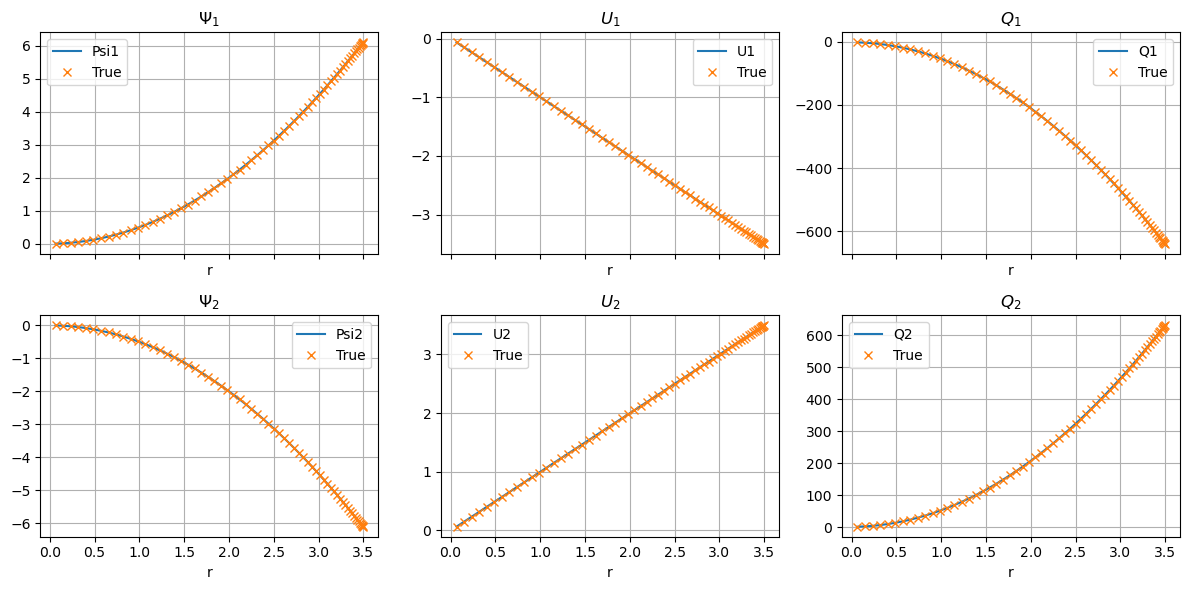

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6), sharex=True)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# First row
ax[0, 0].plot(r, Psi1, label='Psi1')
ax[0, 0].plot(r, 0.5 * r**2, 'x', label='True')
ax[0, 0].set_title(r'$\Psi_1$')
ax[0, 0].legend()

ax[0, 1].plot(r, U1, label='U1')
ax[0, 1].plot(r, -r, 'x', label='True')
ax[0, 1].set_title(r'$U_1$')
ax[0, 1].legend()

ax[0, 2].plot(r, Q1, label='Q1')
truth = -2 - F1 * r * r - 0.5 * Gamma * r * r 
ax[0, 2].plot(r, truth, 'x', label='True')
ax[0, 2].set_title(r'$Q_1$')
ax[0, 2].legend()

# Second row
ax[1, 0].plot(r, Psi2, label='Psi2')
ax[1, 0].plot(r, -0.5 * r**2, 'x', label='True')
ax[1, 0].set_title(r'$\Psi_2$')
ax[1, 0].legend()

ax[1, 1].plot(r, U2, label='U2')
ax[1, 1].plot(r, r, 'x', label='True')
ax[1, 1].set_title(r'$U_2$')
ax[1, 1].legend()

ax[1, 2].plot(r, Q2, label='Q2')
truth = 2 + F1 * r * r - 0.5 * Gamma * r * r 
ax[1, 2].plot(r, truth, 'x', label='True')
ax[1, 2].set_title(r'$Q_2$')
ax[1, 2].legend()

# Axis labels
for i in range(2):
    for j in range(3):
        ax[i, j].set_xlabel('r')
        ax[i, j].grid(True)

# Optional: adjust layout
plt.tight_layout()
plt.show()


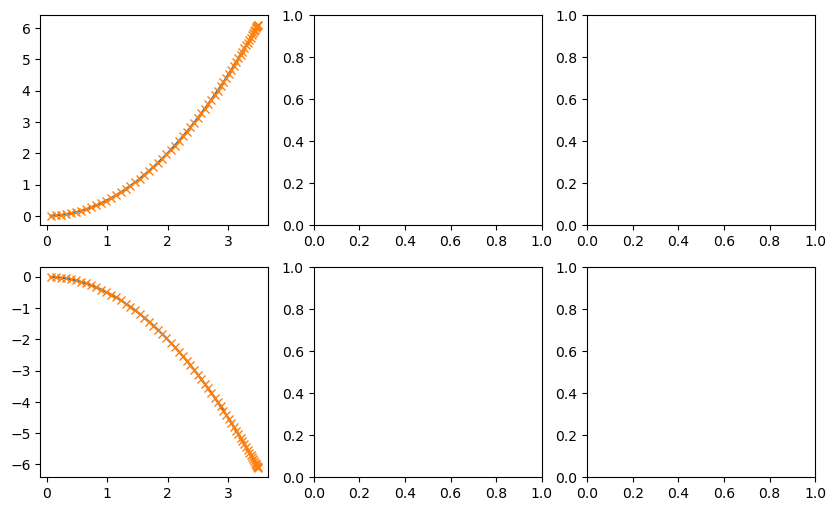

In [10]:
fig, ax = plt.subplots(2,3, figsize=(10,6))
ax[0,0].plot(r, Psi1, label='Psi1')
ax[0,0].plot(r, 0.5 * r * r, 'x', label='True')
ax[0,0].title(r
ax[1,0].plot(r, Psi2, label='Psi1')
ax[1,0].plot(r, -0.5 * r * r, 'x', label='True')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.plot(r, Psi1, label='Psi1')
ax.plot(r, 0.5 * r * r, 'x', label='True')

### Psi = r4

In [2]:
with h5py.File('debug.h5', 'r') as f:
    Psi1 = f["tasks/Psi1"][:]
    Psi2 = f["tasks/Psi2"][:]
    gradPsi1   = f["tasks/gradPsi1"][:]
    skewgradPsi1   = f["tasks/skewgradPsi1"][:]  
    lapPsi1   = f["tasks/lapPsi1"][:]
    # Q1   = f["tasks/Q1"][:].flatten()
    r    = f["tasks/r"][:]
    phi  = f["tasks/phi"][:]
    x    = f["tasks/x"][:]
    y  = f["tasks/y"][:]

In [4]:
Psi1.shape 

(32, 64)

/tmp/ipykernel_22562/2432317021.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax[0].pcolormesh(x[:,st:ed], y[:,st:ed], lapPsi1[:,st:ed])
/tmp/ipykernel_22562/2432317021.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax[1].pcolormesh(x[:,st:ed], y[:,st:ed], truth[:,st:ed])
/tmp/ipykernel_22562/2432317021.py:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  i

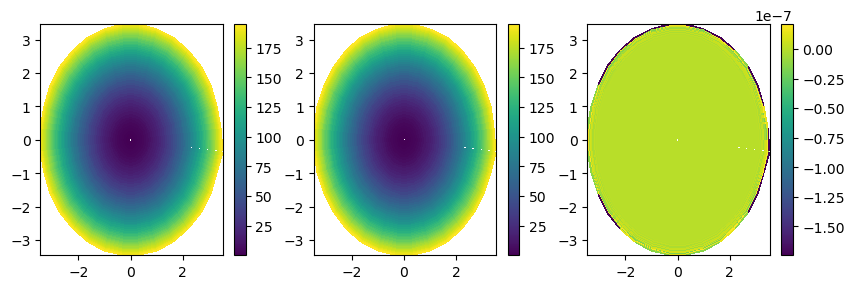

In [8]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
st = 0
ed = -2
# truth = Psi1 * 0 + r**4 
# truth = Psi1 * 0 + 4 * (r**3)
truth = Psi1 * 0 + 16 * (r**2)

# im = ax[0].pcolormesh(x[:,st:ed], y[:,st:ed], Psi1[:,st:ed])
# im = ax[0].pcolormesh(x[:,st:ed], y[:,st:ed], gradPsi1[1,:,st:ed])
# im = ax[0].pcolormesh(x[:,st:ed], y[:,st:ed], skewgradPsi1[0,:,st:ed])
im = ax[0].pcolormesh(x[:,st:ed], y[:,st:ed], lapPsi1[:,st:ed])
plt.colorbar(im)

im = ax[1].pcolormesh(x[:,st:ed], y[:,st:ed], truth[:,st:ed])
plt.colorbar(im)

# im = ax[2].pcolormesh(x[:,st:ed], y[:,st:ed], Psi1[:,st:ed] - truth[:,st:ed])
# im = ax[2].pcolormesh(x[:,st:ed], y[:,st:ed], gradPsi1[1,:,st:ed] - truth[:,st:ed])
# im = ax[2].pcolormesh(x[:,st:ed], y[:,st:ed], skewgradPsi1[0,:,st:ed] - truth[:,st:ed])
im = ax[2].pcolormesh(x[:,st:ed], y[:,st:ed], lapPsi1[:,st:ed] - truth[:,st:ed])
plt.colorbar(im)

# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], gradPsi1[0,:,st:ed] + 6 * np.sin(6 * phi)*r[0,st:ed])
# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], gradPsi1[1,:,st:ed] - 2 * (np.cos(6 * phi)*r[0,st:ed]))
# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], skewgradPsi1[0,:,st:ed] - 2 * np.cos(6 * phi)*r[0,st:ed])
# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], skewgradPsi1[1,:,st:ed] - 6 * np.sin(6 * phi)*r[0,st:ed])



# n = np.argmax(np.abs(lapPsi1[:,3:-3] - truth[:,3:-3]))
# x_max = x[:,3:-3].flatten()[n]
# y_max = y[:,3:-3].flatten()[n]
# ax.scatter(x_max, y_max, color='red', marker='x', s=60)



### Psi = cos(6 * phi) * r2

In [8]:
with h5py.File('debug1.h5', 'r') as f:
    Psi1 = f["tasks/Psi1"][:]
    Psi2 = f["tasks/Psi2"][:]
    gradPsi1   = f["tasks/gradPsi1"][:]
    skewgradPsi1   = f["tasks/skewgradPsi1"][:]  
    lapPsi1   = f["tasks/lapPsi1"][:]
    # Q1   = f["tasks/Q1"][:].flatten()
    r    = f["tasks/r"][:]
    phi  = f["tasks/phi"][:]
    x    = f["tasks/x"][:]
    y  = f["tasks/y"][:]

/tmp/ipykernel_7568/4152630852.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], lapPsi1[:,st:ed])


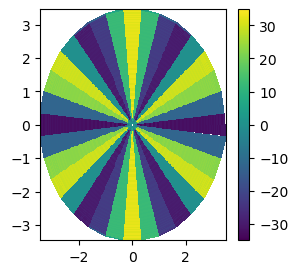

In [28]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
st = 0
ed = -2
# im = ax.pcolormesh(x, y, Psi1- np.cos(6 * phi) * (r**2))
# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], gradPsi1[0,:,st:ed] + 6 * np.sin(6 * phi)*r[0,st:ed])
# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], gradPsi1[1,:,st:ed] - 2 * (np.cos(6 * phi)*r[0,st:ed]))
# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], skewgradPsi1[0,:,st:ed] - 2 * np.cos(6 * phi)*r[0,st:ed])
# im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], skewgradPsi1[1,:,st:ed] - 6 * np.sin(6 * phi)*r[0,st:ed])
truth = 4 * np.cos(6*phi) - 36 * np.sin(6 * phi) * (r * 0 + 1)
im = ax.pcolormesh(x[:,st:ed], y[:,st:ed], lapPsi1[:,st:ed])

# n = np.argmax(np.abs(lapPsi1[:,3:-3] - truth[:,3:-3]))
# x_max = x[:,3:-3].flatten()[n]
# y_max = y[:,3:-3].flatten()[n]
# ax.scatter(x_max, y_max, color='red', marker='x', s=60)

plt.colorbar(im)

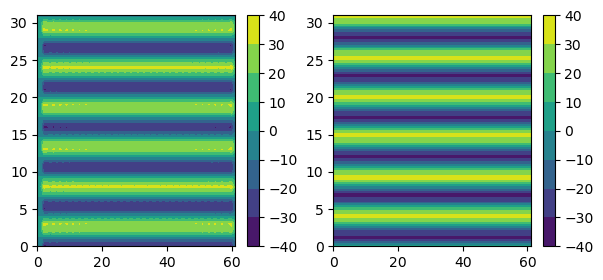

In [31]:
fig, ax = plt.subplots(1,2, figsize=(7,3))
st = 0
ed = -2
truth = 4 * np.cos(6*phi) - 36 * np.sin(6 * phi) * (r * 0 + 1)
im = ax[0].contourf(lapPsi1[:,st:ed])
plt.colorbar(im)

im = ax[1].contourf(truth[:,st:ed])
plt.colorbar(im)

In [33]:
# fig, ax = plt.subplots(1,2, figsize=(7,3))
# st = 0
# ed = -2
# truth = 2 * r * np.cos(6*phi) 
# im = ax[0].contourf(skewgradPsi1[0,:,st:ed])
# plt.colorbar(im)

# im = ax[1].contourf(truth[:,st:ed])
# plt.colorbar(im)